In [212]:
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
from shapely.geometry import Point,Polygon
import csv
import random
from geopandas.tools import sjoin
import multiprocessing as mp

In [213]:
lat = []
lon = []
data_points = 1000
for i in range(data_points):
    x = random.uniform(-90,90)
    lat.append(x)
    
    
for i in range(data_points):
    x = random.uniform(-180,180)
    lon.append(x)

df_cord = pd.DataFrame(lon , columns = ['Lon'])
df_cord['Lat'] = lat
geometry = [Point(xy) for xy in zip(df_cord.Lon, df_cord.Lat)]
df_cord = df_cord.drop(['Lon' , 'Lat' ], axis=1)
crs = {'init': 'epsg:4326'}
gdf = geopandas.GeoDataFrame(df_cord, crs=crs, geometry=geometry)

      pop_est continent         name iso_a3  gdp_md_est  \
0  28400000.0      Asia  Afghanistan    AFG     22270.0   
1  12799293.0    Africa       Angola    AGO    110300.0   
2   3639453.0    Europe      Albania    ALB     21810.0   

                                            geometry  
0  POLYGON ((61.21081709172574 35.65007233330923,...  
1  (POLYGON ((16.32652835456705 -5.87747039146621...  
2  POLYGON ((20.59024743010491 41.85540416113361,...  


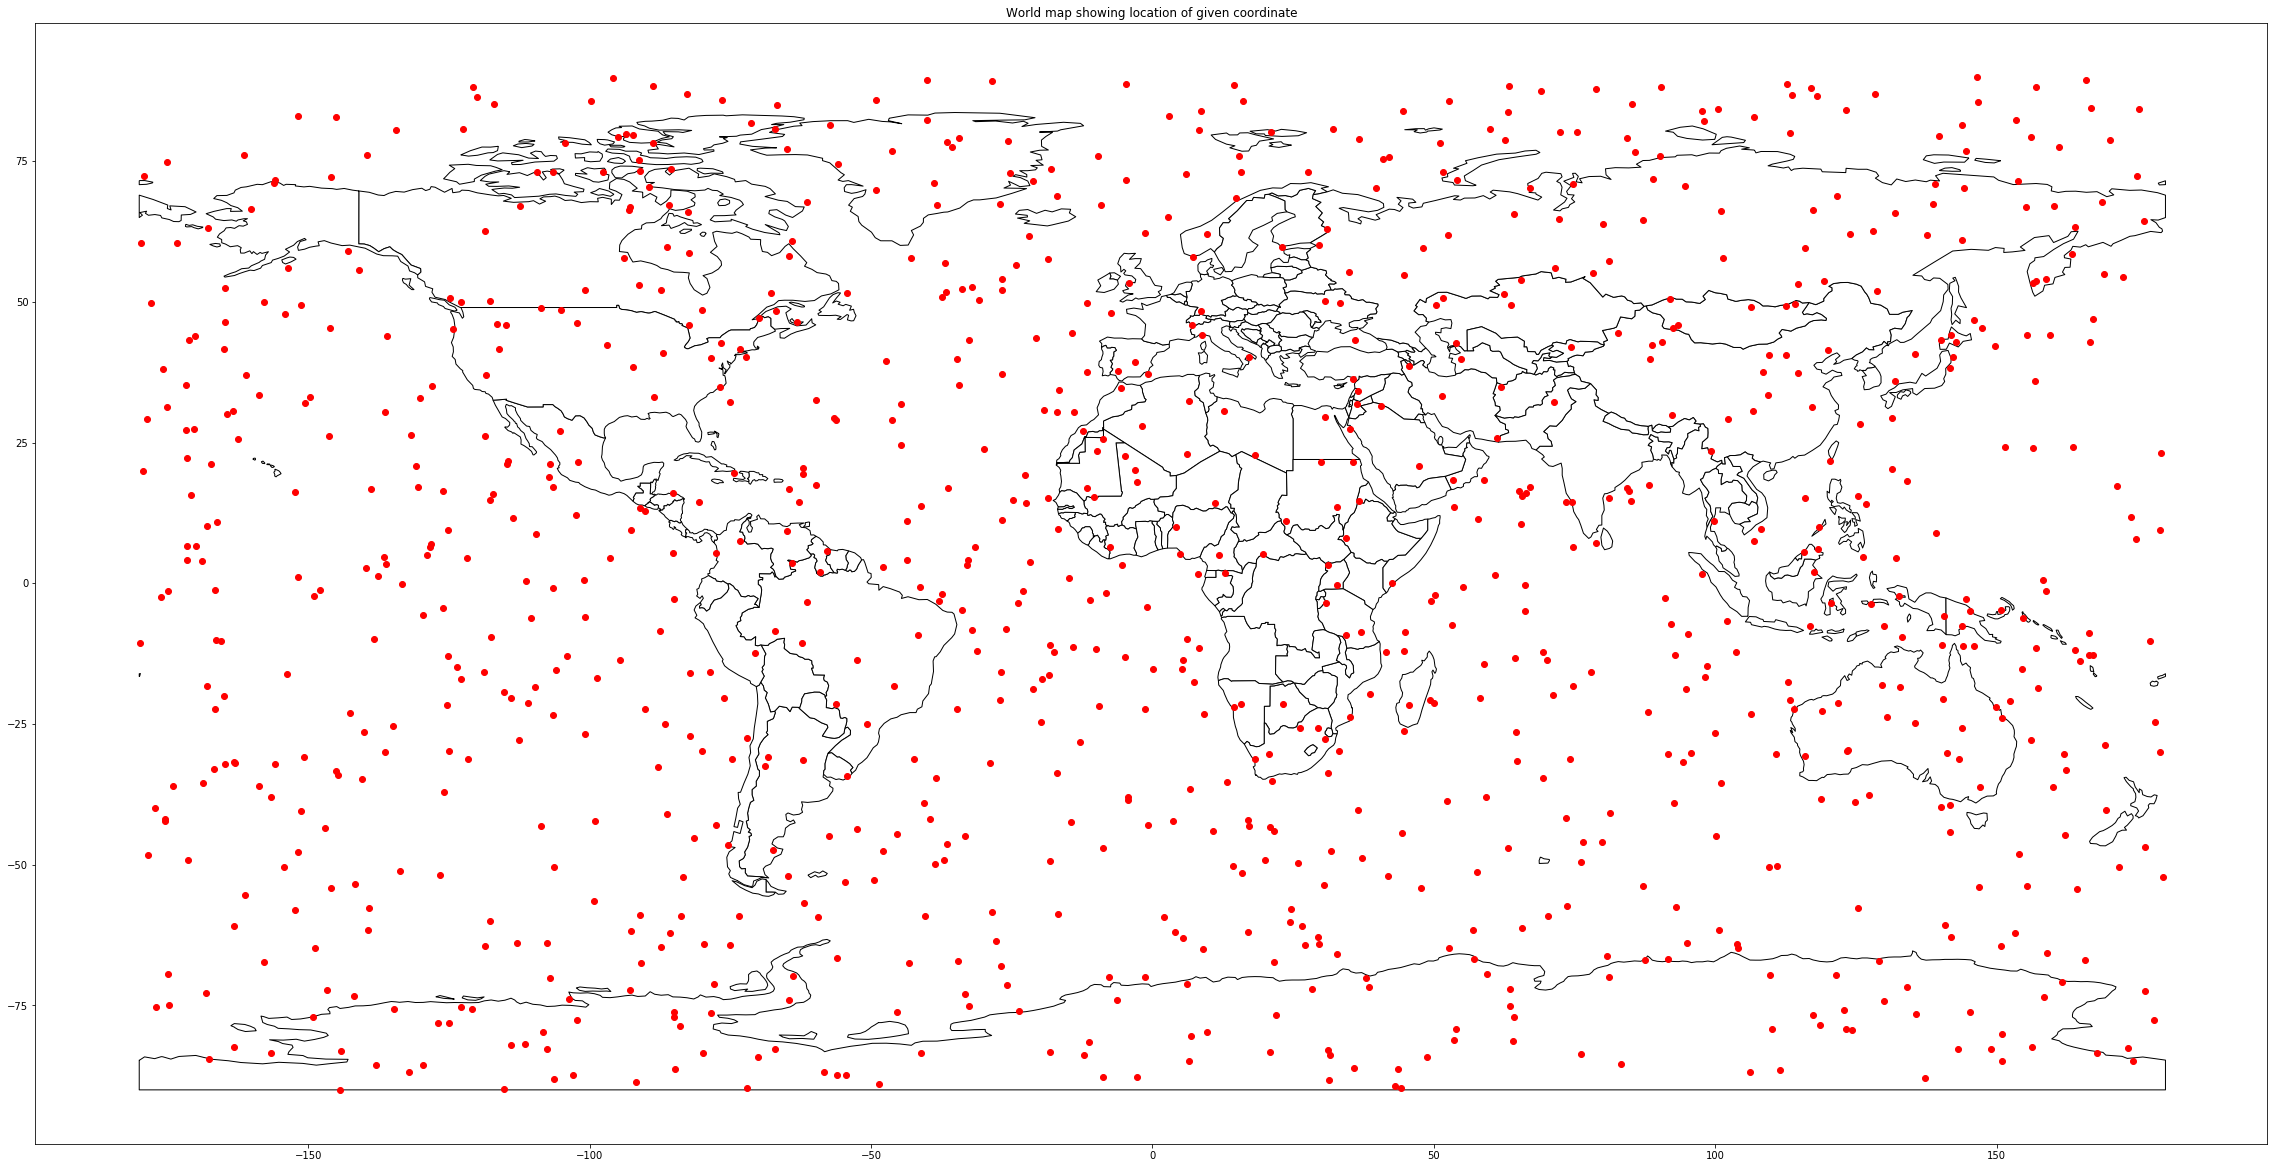

In [222]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world.plot( color='white', edgecolor='black' ,figsize = (40,30))
gdf.plot(ax=ax, color='red')
plt.title("World map showing location of given coordinate")
print(world.head(3))
plt.show()

In [214]:
print(gdf.head())

                                       geometry
0  POINT (-73.31364658892987 7.436909486197592)
1  POINT (122.9538026313629 -75.88922751479316)
2  POINT (-18.50991572546937 57.61587071200964)
3  POINT (50.14278575942308 -1.990451810363354)
4  POINT (74.26042412001476 -31.16260819064632)


In [215]:
# omaha_point_shp = Point(omaha_point)
# print(omaha_point_shp)

In [216]:
# omaha_point = np.array((77.22897, 28.65381))


In [217]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
df_new = world[['continent' , 'name' , 'geometry']]

In [218]:
print(df_new.shape)

(177, 3)


In [219]:
print(world.head())

      pop_est      continent                  name iso_a3  gdp_md_est  \
0  28400000.0           Asia           Afghanistan    AFG     22270.0   
1  12799293.0         Africa                Angola    AGO    110300.0   
2   3639453.0         Europe               Albania    ALB     21810.0   
3   4798491.0           Asia  United Arab Emirates    ARE    184300.0   
4  40913584.0  South America             Argentina    ARG    573900.0   

                                            geometry  
0  POLYGON ((61.21081709172574 35.65007233330923,...  
1  (POLYGON ((16.32652835456705 -5.87747039146621...  
2  POLYGON ((20.59024743010491 41.85540416113361,...  
3  POLYGON ((51.57951867046327 24.24549713795111,...  
4  (POLYGON ((-65.50000000000003 -55.199999999999...  


In [220]:
df_merged = pd.DataFrame(np.nan, index=range(data_points), columns=['Country'])

In [221]:
%%time
# omaha_point_shp = Point(omaha_point)
for index,row in gdf.iterrows():
    a = row['geometry']
    filter = df_new['geometry'].contains(a)
    x = df_new.loc[filter]
    value_c = x['name'].to_string(index = False)
    df_merged.loc[index, 'Country'] = value_c if value_c != 'Series([], )' else np.NaN


print(df_merged)

            Country
0          Colombia
1        Antarctica
2               NaN
3               NaN
4               NaN
5             China
6        Mozambique
7     United States
8               NaN
9               NaN
10              NaN
11              NaN
12              NaN
13              NaN
14         Malaysia
15          Namibia
16        Australia
17              NaN
18              NaN
19            Sudan
20              NaN
21       Antarctica
22              NaN
23              NaN
24              NaN
25              NaN
26              NaN
27             Iran
28              NaN
29         Mongolia
..              ...
970             NaN
971            Iran
972             NaN
973      Antarctica
974      Antarctica
975             NaN
976             NaN
977             NaN
978             NaN
979             NaN
980       Greenland
981             NaN
982             NaN
983             NaN
984          Russia
985      Antarctica
986           China
987             NaN
